In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def inside_obstacle(point,obstacle):
    """
    returns 1 if the point is inside any obstacles
    0 otherwise
    """
    for obs in obstacle:
        if point[0]>obs[0][0] and point[0]<obs[0][2] and point[1]>obs[1][0] and point[1]<obs[1][2]:
            return 1
    return 0

def through_obstacle(line,obstacles):
    """
    returns 1 if the line goes through any obstacles
    0 otherwise
    """
    for i in range(10):
        if inside_obstacle((line[0]+(i*(line[2]-line[0])/10),line[1]+(i*(line[3]-line[1])/10)),obstacles)==1:
            return 1
    return 0

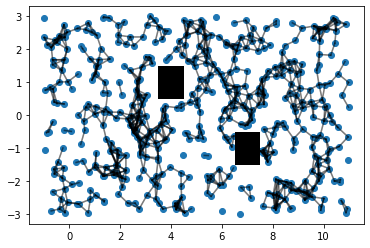

476


In [42]:
# ********************************************************************************* #
# LEARNING
# ********************************************************************************* #

# obstacle
obstacles=[[(3.5,4.5,4.5,3.5),(0.5,0.5,1.5,1.5)],
           [(6.5,7.5,7.5,6.5),(-1.5,-1.5,-0.5,-0.5)]]
xlimits=[-1,11]
ylimits=[-3,3]

# xlimits=(-2.,15.)
# ylimits=(-2.,15.)
# obstacles=[[(1,2,2,1),(1,1,5,5)],
#            [(3,4,4,3),(4,4,12,12)],
#            [(3,12,12,3),(12,12,13,13)],
#            [(12,13,13,12),(5,5,13,13)],
#            [(6,12,12,6),(5,5,6,6)]]

# plot obstacle
for obs in obstacles:
    plt.fill(*obs,'k',alpha=1)

# samples
noofsamples=500
x=np.random.uniform(*xlimits,noofsamples)
y=np.random.uniform(*ylimits,noofsamples)
# x=(np.random.rand(200)*12)-1
# y=(np.random.rand(200)*6)-3

# eliminate samples inside obstacles
xindex=np.array([],dtype=int)
yindex=np.array([],dtype=int)
for i in range(len(x)):
    if inside_obstacle((x[i],y[i]),obstacles):
        xindex=np.append(xindex,i)
        yindex=np.append(yindex,i)
x=np.delete(x,xindex)
y=np.delete(y,yindex)

# plot
radius=0.5
graph=[]
plt.scatter(x,y)
for i in range(len(x)):
    for j in range(len(y)):
        if np.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2)<=radius and x[i]!=x[j] and y[i]!=y[j]:
            if through_obstacle((x[i],y[i],x[j],y[j]),obstacles)==0:
                plt.plot([x[i],x[j]],[y[i],y[j]],'k',alpha=0.3)
                graph.append([x[i],y[i],x[j],y[j]])
                pass
            pass

plt.show()

# ********************************************************************************* #
# CREATE A GRAPH (UNDIRECTED)
# ********************************************************************************* #

g_dict={}
keys=[]
keys_str=[]
goal=[10,0]

for i in range(len(graph)):
    if str(graph[i][:2]) in g_dict.keys():
        g_dict[str(graph[i][:2])].append(str(graph[i][2:]))
        pass
    else:
        g_dict[str(graph[i][:2])]=[str(graph[i][2:])]
        keys.append(graph[i][:2])
        keys_str.append(str(graph[i][:2]))

for key in g_dict.keys():
    indx=keys_str.index(key)
    g_dict[key]=[g_dict[key]]
    ldist=[]
    g_dict[key].append([1]*len(g_dict[key][0]))
    g_dict[key].append(100*(np.sqrt(((keys[indx][0])-goal[0])**2+((keys[indx][1])-goal[1])**2)))
print(len(keys))

graph=g_dict

In [34]:
def pathcost(nodes):
    '''
    returns the path cost through the input nodes
    '''
    nodes.reverse()
    # print(nodes)
    length=0
    # for i in range(len(nodes)-1):
    #     index=graph[nodes[i]][0].index(nodes[i+1])
    #     length=length+(graph[nodes[i]][1][index])
    #     pass
    for i in range(len(nodes)-1):
        indx1=keys_str.index(nodes[i])
        indx2=keys_str.index(nodes[i+1])
        length=length+np.sqrt((keys[indx1][0]-keys[indx2][0])**2+(keys[indx1][1]-keys[indx2][1])**2)
        pass
    # print(length)
    return length

In [43]:
# ********************************************************************************* #
# APPLY A*
# ********************************************************************************* #

# algo=int(input("\nWhich algorithm do you want to implement: a*(1) or dijkstra's(2)?"))

start=[0,0]

goal=[10,0]

startmin=float('inf')
goalmin=float('inf')

for point in keys:
    startdist=np.sqrt((start[0]-point[0])**2+(start[1]-point[1])**2)
    if startdist<startmin:
        startmin=startdist
        startprm=str(point)
        pass
    goaldist=np.sqrt((goal[0]-point[0])**2+(goal[1]-point[1])**2)
    if goaldist<goalmin:
        goalmin=goaldist
        goalprm=str(point)
        pass

# starts with the start node
stack=[[0,startprm]]
C=[]
# update
final=startprm
prefinal=0

t1=time.time()

iterations=0

while final!=goalprm and len(C)<len(graph):

    # add child nodes
    newstack=[]
    # print([graph[stack[0][1]][0],graph[stack[0][1]][1]])
    if len(stack)==0:
        print("Tree is dissconected!!")
        break
    for child,cost in np.transpose([graph[stack[0][1]][0],graph[stack[0][1]][1]]):
        path=pathcost([child,*stack[0][1:]])
        newelement=[path+graph[child][2],child,*stack[0][1:]]
        # newelement=[graph[child][2],child,*stack[0][1:]]
        # newelement=[path,child,*stack[0][1:]]
        newstack.append(newelement)

    # put first node in C list
    if stack[0][1] not in C:
        C.append(stack[0][1])
    else:
        stack.pop(0)
        continue

    # delete first node in stack
    stack.pop(0)

    # update the newstack with remaining stack elements
    for x in range(len(stack)):
        newstack.append(stack[x])
    stack=newstack

    # sort
    stack.sort()
    final=stack[0][1]
    # print(final)

    # put first node in C list
    # if stack[0][1] not in C:
    #     C.append(stack[0][1])
    #     print(len(C))
    # else:
    #     for pop in range(len(newstack)):
    #         stack.pop(0)

    # if final in C:
    #     for pop in range(len(newstack)):
    #         stack.pop(0)
        # break

    iterations+=1
    # if prefinal!=final:
    #     prefinal=final
    # else:
    #     print("not connected")
    #     break
    
    # print(len(stack))
    
    pass

t2=time.time()-t1
if final==goalprm:
    print("\nPath for A* is:",stack[0][1:],"\nThe cost is:",stack[0][0],"\nThe time taken is:",t2,"\nIterations:",iterations)
else:
    print("\nPath to Goal not found!!!")


Path for A* is: ['[10.01476301552688, -0.16957573175060325]', '[10.045418613768218, 0.24280258433502988]', '[9.602016206412914, 0.2884689325906029]', '[9.18572658653541, 0.22551561357607852]', '[8.924619445945165, 0.600311685584817]', '[8.73478963400558, 0.946799917810293]', '[8.34640933664115, 1.2066863133998655]', '[8.14573740548908, 1.1790935595326504]', '[7.739236959275985, 1.1506317547969802]', '[7.620727712052139, 0.7402341752927502]', '[7.444501725726214, 0.32152734638587965]', '[7.053039976731261, 0.5940461837026119]', '[6.904098172584725, 0.8871357977384018]', '[6.49801846981622, 0.8656705417382557]', '[6.3154455526757705, 1.3144005097970206]', '[5.951307522256641, 1.2423846086251293]', '[5.52619826840955, 1.2213276530563126]', '[5.373215740932197, 0.7673385414504503]', '[5.031126588845234, 0.4556208256407528]', '[4.729487044401329, 0.3907912468392851]', '[4.403356148711837, 0.3360121818593709]', '[4.213966913976561, 0.2303985983851331]', '[3.778246190517729, 0.27521147321240

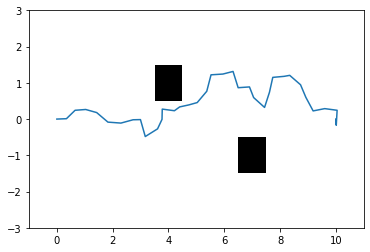

In [44]:
finalpath=[]
finalpath.append(goal)
for i in stack[0][1:]:
    for j in range(len(keys_str)):
        if i==keys_str[j]:
            finalpath.append(keys[j])
finalpath.append(start)
finalpath=np.transpose(finalpath)
plt.plot(*finalpath)
for obs in obstacles:
    plt.fill(*obs,'k',alpha=1)
plt.xlim(*xlimits)
plt.ylim(*ylimits)
plt.show()

In [15]:
import math

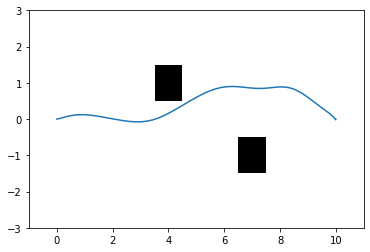

In [45]:
# ********************************************************************************* #
# Path Smoothing
# ********************************************************************************* #
finalpathT=np.transpose(finalpath)
space=np.linspace(0,1,50)
bezier=[]
for t in space:
    n=len(finalpathT)
    x=0
    y=0
    for points in range(n):
        combinatorics=(math.factorial(n)/(math.factorial(points)*math.factorial(n-points)))
        x=x+combinatorics*(np.power((1-t),points))*(np.power(t,(n-points)))*finalpathT[points][0]
        y=y+combinatorics*(np.power((1-t),points))*(np.power(t,(n-points)))*finalpathT[points][1]
    bezier.append([x,y])

plt.plot(tuple(np.transpose(bezier)[0]),tuple(np.transpose(bezier)[1]))
for obs in obstacles:
    plt.fill(*obs,'k',alpha=1)
plt.xlim(*xlimits)
plt.ylim(*ylimits)
plt.show()

In [ ]:
# ********************************************************************************* #
# Box Plots
# ********************************************************************************* #
